**DEP TASK 1**

---

Data Collection/Preprocessing:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load the data
file_path = '/content/Retail_Transactions_Dataset.csv'  # Replace with your file path
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows to understand the structure
print(data.head())


data = data.dropna(subset=['Transaction_ID'])

# Convert data types for numerical columns
data['Transaction_ID'] = data['Transaction_ID'].astype(int)
data['Total_Items'] = data['Total_Items'].astype(int)
data['Total_Cost'] = data['Total_Cost'].astype(float)

# Parse InvoiceDate to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Remove duplicate rows
data = data.drop_duplicates()

# Filter out rows with non-positive quantities and prices
data = data[(data['Total_Items'] > 0) & (data['Total_Cost'] > 0)]

# Display the cleaned data
print(data.head())



<ipython-input-1-0b681258fda2>:8: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, encoding='ISO-8859-1')


   Transaction_ID                 Date      Customer_Name  \
0      1000000000  2022-01-21 06:27:29       Stacey Price   
1      1000000001  2023-03-01 13:01:21   Michelle Carlson   
2      1000000002  2024-03-21 15:37:04        Lisa Graves   
3      1000000003  2020-10-31 09:59:47  Mrs. Patricia May   
4      1000000004  2020-12-10 00:59:59     Susan Mitchell   

                                             Product  Total_Items  Total_Cost  \
0        ['Ketchup', 'Shaving Cream', 'Light Bulbs']            3       71.65   
1  ['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...            2       25.93   
2                                        ['Spinach']            6       41.49   
3                             ['Tissues', 'Mustard']            1       39.34   
4                                      ['Dish Soap']           10       16.42   

   Payment_Method           City        Store_Type Discount_Applied  \
0  Mobile Payment    Los Angeles    Warehouse Club             True   
1   

EDA:

In [ ]:
data = data[(data['Total_Items'] > 0) & (data['Total_Cost'] > 0)]
# Summary Statistics
print(data.describe())



       Transaction_ID                           Date    Total_Items  \
count    1.423790e+05                         142379  142379.000000   
mean     1.000071e+09  2022-03-11 08:05:02.379009280       5.503782   
min      1.000000e+09            2020-01-01 00:14:06       1.000000   
25%      1.000036e+09            2021-02-04 09:25:17       3.000000   
50%      1.000071e+09            2022-03-10 13:38:52       6.000000   
75%      1.000107e+09     2023-04-16 12:06:39.500000       8.000000   
max      1.000142e+09            2024-05-18 19:29:37      10.000000   
std      4.110142e+04                            NaN       2.877019   

          Total_Cost  
count  142379.000000  
mean       52.414587  
min         5.000000  
25%        28.740000  
50%        52.380000  
75%        76.110000  
max       100.000000  
std        27.419226  


In [ ]:
# Function to add annotations
def add_annotations(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points')

In [ ]:
data.groupby('Store_Type')['Total_Cost'].mean()

Store_Type
Convenience Store    52.329450
Department Store     52.150035
Pharm                82.700000
Pharmacy             52.722053
Specialty Store      52.240175
Supermarket          52.332261
Warehouse Club       52.714343
Name: Total_Cost, dtype: float64

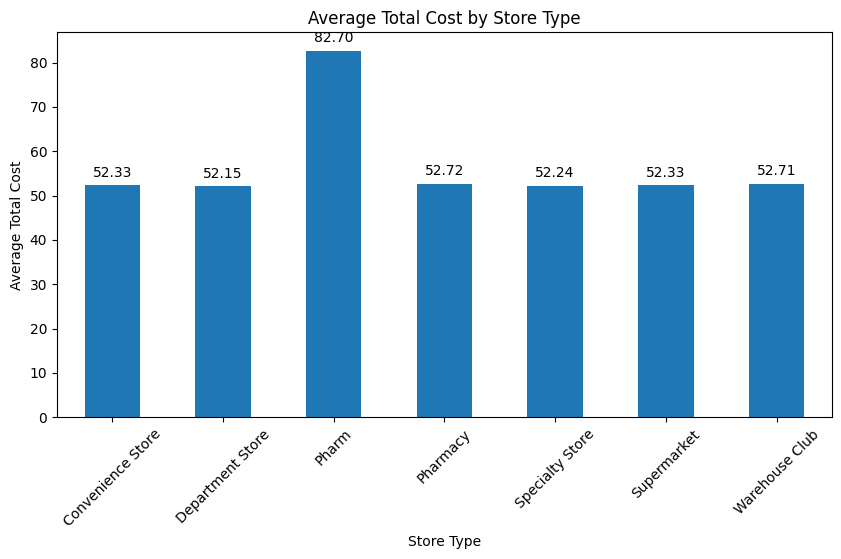

In [ ]:
plt.figure(figsize=(10, 5))
ax = data.groupby('Store_Type')['Total_Cost'].mean().plot(kind='bar')
plt.title('Average Total Cost by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Average Total Cost')
plt.xticks(rotation=45)
add_annotations(ax)
plt.show()

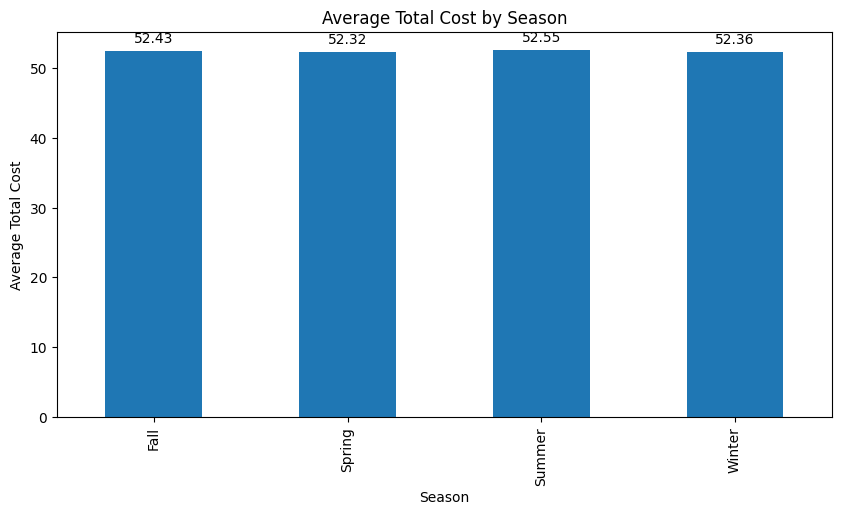

In [ ]:
# 3. Distribution of Total Cost across Seasons
plt.figure(figsize=(10, 5))
ax = data.groupby('Season')['Total_Cost'].mean().plot(kind='bar')
plt.title('Average Total Cost by Season')
plt.xlabel('Season')
plt.ylabel('Average Total Cost')
add_annotations(ax)
plt.show()

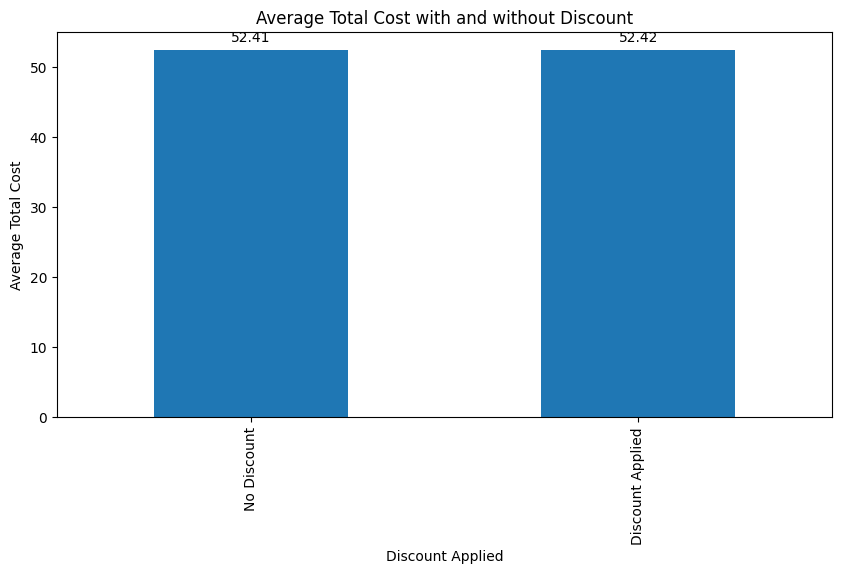

In [ ]:
# 4. Distribution of Total Cost with and without Discount Applied
plt.figure(figsize=(10, 5))
ax = data.groupby('Discount_Applied')['Total_Cost'].mean().plot(kind='bar')
plt.title('Average Total Cost with and without Discount')
plt.xlabel('Discount Applied')
plt.ylabel('Average Total Cost')
plt.xticks(ticks=[0, 1], labels=['No Discount', 'Discount Applied'])
add_annotations(ax)
plt.show()

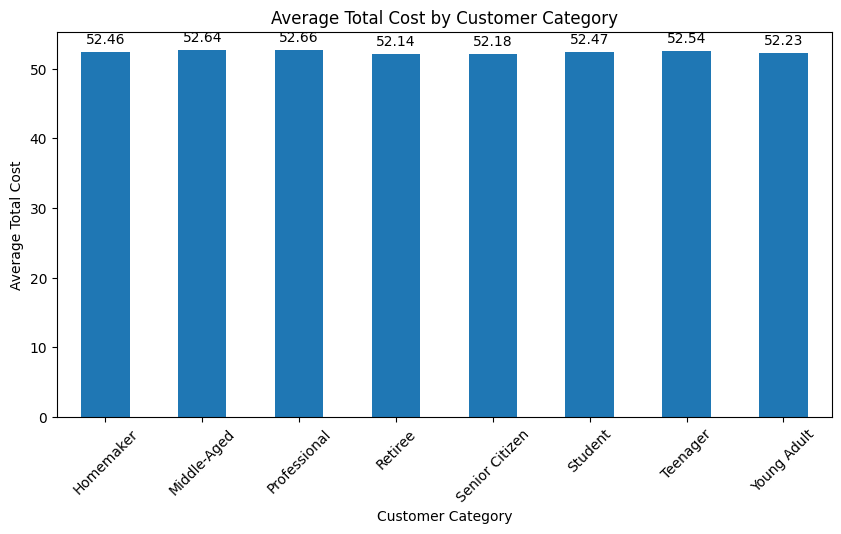

In [ ]:
plt.figure(figsize=(10, 5))
ax = data.groupby('Customer_Category')['Total_Cost'].mean().plot(kind='bar')
plt.title('Average Total Cost by Customer Category')
plt.xlabel('Customer Category')
plt.ylabel('Average Total Cost')
plt.xticks(rotation=45)
add_annotations(ax)
plt.show()


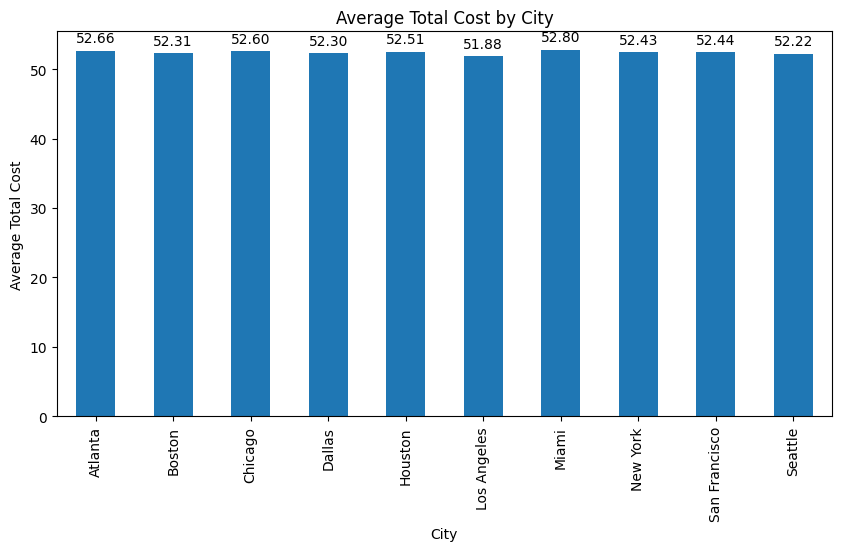

In [ ]:
# 6. Distribution of Total Cost by City
plt.figure(figsize=(10, 5))
ax = data.groupby('City')['Total_Cost'].mean().plot(kind='bar')
plt.title('Average Total Cost by City')
plt.xlabel('City')
plt.ylabel('Average Total Cost')
plt.xticks(rotation=90)
add_annotations(ax)
plt.show()

Clustring through Kmean/Vizulazing customer segmentation

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select relevant numerical features
features = data[['Total_Items', 'Total_Cost']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


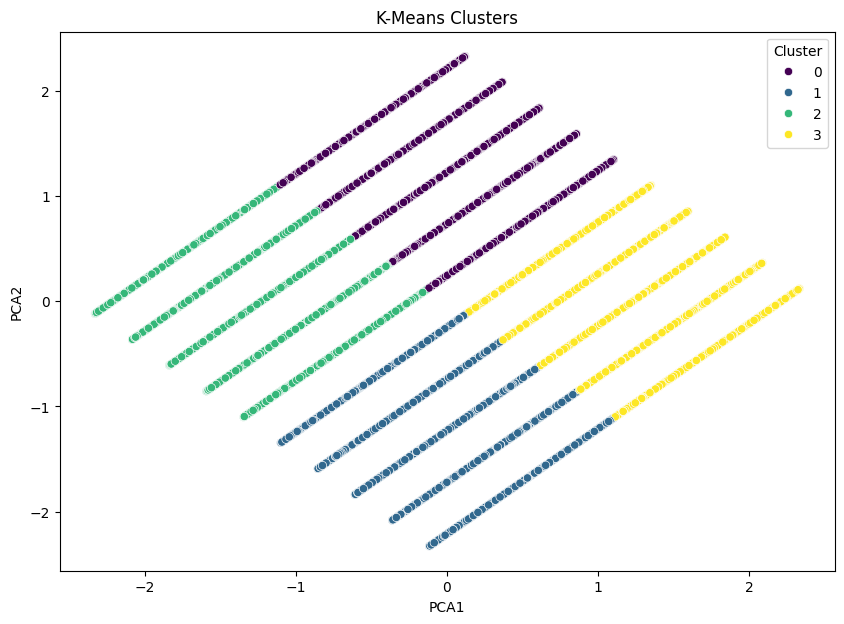

In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Add PCA results to the dataframe
data['PCA1'] = pca_features[:, 0]
data['PCA2'] = pca_features[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('K-Means Clusters')
plt.show()
